In [1]:
cd ..

/Users/kimyoungh/GoogleDrive/rich/main/rich


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyupbit

from data_processing.trading_sequence_generator import TradingSequenceGenerator

%load_ext autoreload
%autoreload 2

In [3]:
with open('train_data/trading_bc_transformer/train_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [4]:
dataset.keys()

dict_keys(['action_series', 'rets_series', 'rew_series', 'val_series', 'date_series', 'observations'])

In [5]:
dataset['date_series']

array(['2021-12-15T11:00:00.000000000', '2021-12-15T12:00:00.000000000',
       '2021-12-15T13:00:00.000000000', ...,
       '2022-12-24T17:00:00.000000000', '2022-12-24T18:00:00.000000000',
       '2022-12-24T19:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
help(pyupbit.get_ohlcv)

Help on function get_ohlcv in module pyupbit.quotation_api:

get_ohlcv(ticker='KRW-BTC', interval='day', count=200, to=None, period=0.1)



In [7]:
price = pyupbit.get_ohlcv('KRW-XRP', interval='minute5',
                        count=24 * 12 * 20 + 144 + (24 * 12 * 10))

In [8]:
price

,open,high,low,close,volume,value
2022-12-24 21:00:00,458.0,460.0,458.0,459.0,1.978320e+05,9.082665e+07
2022-12-24 21:05:00,459.0,460.0,459.0,460.0,7.815761e+04,3.594041e+07
2022-12-24 21:10:00,460.0,460.0,459.0,459.0,7.343544e+04,3.374640e+07
2022-12-24 21:15:00,459.0,460.0,459.0,459.0,7.371990e+04,3.385582e+07
2022-12-24 21:20:00,459.0,460.0,459.0,460.0,1.061183e+05,4.875430e+07
...,...,...,...,...,...,...
2023-01-24 12:10:00,531.0,531.0,530.0,531.0,6.717387e+05,3.562802e+08
2023-01-24 12:15:00,531.0,532.0,530.0,530.0,1.121833e+06,5.955310e+08
2023-01-24 12:20:00,531.0,531.0,530.0,531.0,5.698533e+05,3.025348e+08
2023-01-24 12:25:00,531.0,531.0,529.0,530.0,1.132409e+06,6.002005e+08


In [9]:
rets = np.log(price).diff(1)
rr = rets.rolling(6).sum().dropna()

<AxesSubplot:>

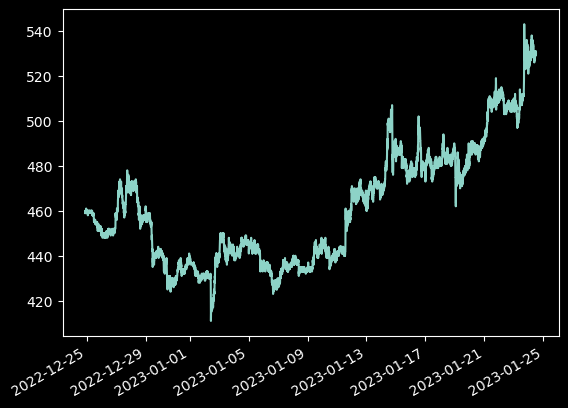

In [10]:
price['close'].plot()

In [11]:
price.shape

(8784, 6)

<AxesSubplot:>

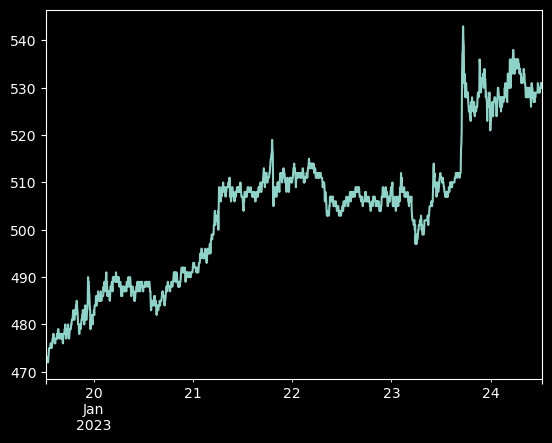

In [12]:
price['close'].iloc[-1440:].plot()

In [13]:
24 * 12

288

In [14]:
price.shape

(8784, 6)

In [15]:
tsg = TradingSequenceGenerator(price,
                            window=288, trading_period=72,
                            fee=0.002, decay=0.99, window_fwd=12)

In [16]:
tsg.rsi

,close
2022-12-25 20:55:00,0.599882
2022-12-25 21:00:00,0.666434
2022-12-25 21:05:00,0.571573
2022-12-25 21:10:00,0.625060
2022-12-25 21:15:00,0.625060
...,...
2023-01-24 11:15:00,0.625005
2023-01-24 11:20:00,0.555769
2023-01-24 11:25:00,0.600147
2023-01-24 11:30:00,0.444643


In [19]:
dataset = tsg.generate_overall_dataset(
    pick_num=4, sample_num=5, temp=100, rn_calc=False)

best done!


In [20]:
for key, data in dataset.items():
    print(key, data.shape)

action_series (8414, 5, 72)
rets_series (8414, 5, 72)
rew_series (8414, 5, 72)
val_series (8414, 5, 72)
updown_series (8414, 72)
date_series (8414,)
observations (8414, 72, 8)


<AxesSubplot:>

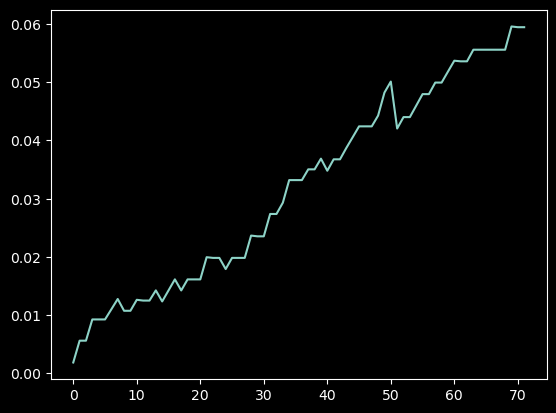

In [21]:
((1 + pd.Series(dataset['rets_series'][-1][0])).cumprod() - 1).plot()

In [22]:
dataset['action_series'][-100]

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0],
    

In [23]:
dataset['rew_series'][-10][0]

array([ 1,  1, -2,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1, -2,  0,  1,  1,
        0,  0, -2,  1,  0,  1, -2,  1,  1, -2,  1,  0,  0,  1, -2,  0,  1,
       -2,  0,  0, -2,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1, -2,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1, -2,  0,  1,  1,  0,  1,  0,
        1,  1, -2,  0])

In [24]:
for i in range(dataset['rets_series'].shape[0]):
    r = (1 + pd.Series(dataset['rets_series'][i][0])).cumprod() - 1
    print(r.iloc[-1])

0.029751823387865972
0.03387861651341262
0.035950527732584225
0.036180738960969405
0.03205034131762563
0.03596631764865532
0.035976055038367205
0.03575606131076281
0.03185153410394981
0.02979745964329994
0.02979745964329994
0.03416392945687208
0.029817285267861537
0.03395954375628585
0.03190228959880237
0.034214823984901166
0.03214643483464119
0.03606782462224234
0.03606320039293576
0.03584320839112265
0.03562832020800544
0.029208457130305288
0.030843473113567166
0.03268490464299223
0.02629234847169326
0.030639346068475737
0.026753569057727855
0.03294445528876522
0.030664224703138565
0.03296025515540735
0.028604564186470727
0.025922151121614334
0.03231847365951279
0.025676028965338382
0.02753302745007402
0.017307747037132337
0.017548439244451375
0.019144204629633732
0.023228487077193716
0.016889899519800355
0.01305650281548254
0.015095697260309349
0.021438704422663823
0.02121224136423394
0.018947932747787943
0.014895257460443956
0.014905313607320059
0.01873665275448655
0.01265045949862

In [25]:
for key, data in dataset.items():
    print(key, data.shape)

action_series (8414, 5, 72)
rets_series (8414, 5, 72)
rew_series (8414, 5, 72)
val_series (8414, 5, 72)
updown_series (8414, 72)
date_series (8414,)
observations (8414, 72, 8)


In [26]:
dataset['action_series'][-5:, 0]

array([[0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0],
    

In [27]:
dataset['date_series']

array(['2022-12-25T20:55:00.000000000', '2022-12-25T21:00:00.000000000',
       '2022-12-25T21:05:00.000000000', ...,
       '2023-01-24T05:25:00.000000000', '2023-01-24T05:30:00.000000000',
       '2023-01-24T05:35:00.000000000'], dtype='datetime64[ns]')

In [28]:
dataset['rew_series']

array([[[ 0,  0,  0, ...,  1,  0,  1],
        [ 0,  0,  0, ...,  1,  0,  1],
        [ 0,  0,  0, ...,  1,  0,  1],
        [ 0,  0,  0, ...,  1,  0,  1],
        [ 0,  0,  0, ...,  1,  0,  1]],

       [[ 0,  0,  1, ...,  0,  1,  0],
        [ 0,  0,  1, ...,  0,  1,  0],
        [ 0,  0,  1, ...,  0,  1,  0],
        [ 0,  0,  1, ...,  0,  1,  0],
        [ 0,  0,  1, ...,  0,  1,  0]],

       [[ 0,  1,  1, ...,  1,  0,  0],
        [ 0,  1,  1, ...,  1,  0,  0],
        [ 0,  1,  1, ...,  1,  0,  0],
        [ 0,  1,  1, ...,  1,  0,  0],
        [ 0,  1,  1, ...,  1,  0,  0]],

       ...,

       [[ 0,  1,  1, ...,  0,  0,  1],
        [ 0,  1,  1, ...,  0,  0,  1],
        [ 0,  1,  1, ...,  0,  0,  1],
        [ 0,  1,  1, ...,  0,  0,  1],
        [ 0,  1,  1, ...,  0,  0,  1]],

       [[ 1,  1,  1, ...,  0,  1, -2],
        [ 1,  1,  1, ...,  0,  1, -2],
        [ 1,  1,  1, ...,  0,  1, -2],
        [ 1,  1,  1, ...,  0, -2,  1],
        [ 1,  1,  1, ...,  0,  1, -2]],

  

In [29]:
dataset['updown_series']

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1]])

In [30]:
dataset['rets_series']

array([[[-0.        , -0.        , -0.        , ...,  0.00222222,
         -0.        ,  0.00022717],
        [ 0.        ,  0.        ,  0.        , ...,  0.00022222,
         -0.        ,  0.00022717],
        [ 0.        ,  0.        ,  0.        , ...,  0.00022222,
         -0.        ,  0.00022717],
        [-0.        , -0.        , -0.        , ...,  0.00022222,
         -0.        ,  0.00022717],
        [ 0.        ,  0.        ,  0.        , ...,  0.00022222,
         -0.        ,  0.00022717]],

       [[-0.        , -0.        ,  0.00021729, ..., -0.        ,
          0.00022717,  0.        ],
        [-0.        , -0.        ,  0.00021729, ..., -0.        ,
          0.00022717,  0.        ],
        [ 0.        ,  0.        ,  0.00221729, ..., -0.        ,
          0.00022717,  0.        ],
        [-0.        , -0.        ,  0.00021729, ..., -0.        ,
          0.00022717,  0.        ],
        [-0.        , -0.        ,  0.00021729, ..., -0.        ,
          0.00

In [31]:
price.to_parquet('train_data/trading_bc_transformer/price_train_5.pq')

In [34]:
with open('train_data/trading_bc_transformer/train_dataset_5.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [35]:
dataset['date_series'][-10:]

array(['2023-01-23T14:45:00.000000000', '2023-01-23T14:50:00.000000000',
       '2023-01-23T14:55:00.000000000', '2023-01-23T15:00:00.000000000',
       '2023-01-23T15:05:00.000000000', '2023-01-23T15:10:00.000000000',
       '2023-01-23T15:15:00.000000000', '2023-01-23T15:20:00.000000000',
       '2023-01-23T15:25:00.000000000', '2023-01-23T15:30:00.000000000'],
      dtype='datetime64[ns]')

In [36]:
price.head()

,open,high,low,close,volume,value
2022-12-24 06:55:00,461.0,461.0,460.0,460.0,126051.471844,5.804565e+07
2022-12-24 07:00:00,460.0,461.0,459.0,461.0,132923.792299,6.115216e+07
2022-12-24 07:05:00,461.0,461.0,460.0,461.0,202671.781078,9.338632e+07
2022-12-24 07:10:00,461.0,461.0,460.0,461.0,367691.034527,1.695011e+08
2022-12-24 07:15:00,461.0,461.0,460.0,460.0,525189.801450,2.420708e+08


In [37]:
price.tail()

,open,high,low,close,volume,value
2023-01-23 22:05:00,531.0,533.0,530.0,531.0,2.086896e+06,1.109359e+09
2023-01-23 22:10:00,530.0,533.0,530.0,533.0,2.124647e+06,1.128669e+09
2023-01-23 22:15:00,532.0,534.0,531.0,532.0,2.973999e+06,1.585100e+09
2023-01-23 22:20:00,532.0,532.0,529.0,530.0,3.633905e+06,1.927180e+09
2023-01-23 22:25:00,530.0,532.0,530.0,531.0,4.831737e+05,2.564743e+08


In [38]:
price.shape

(8784, 6)

In [39]:
returns = price.pct_change()

In [40]:
returns

,open,high,low,close,volume,value
2022-12-24 06:55:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-24 07:00:00,-0.002169,0.000000,-0.002174,0.002174,0.054520,0.053518
2022-12-24 07:05:00,0.002174,0.000000,0.002179,0.000000,0.524722,0.527114
2022-12-24 07:10:00,0.000000,0.000000,0.000000,0.000000,0.814219,0.815053
2022-12-24 07:15:00,0.000000,0.000000,0.000000,-0.002169,0.428345,0.428137
...,...,...,...,...,...,...
2023-01-23 22:05:00,-0.003752,-0.003738,-0.001883,-0.001880,-0.606174,-0.607453
2023-01-23 22:10:00,-0.001883,0.000000,0.000000,0.003766,0.018090,0.017407
2023-01-23 22:15:00,0.003774,0.001876,0.001887,-0.001876,0.399761,0.404397
2023-01-23 22:20:00,0.000000,-0.003745,-0.003766,-0.003759,0.221892,0.215810


In [47]:
from numba import njit
import random

@njit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [37]:
monte_carlo_pi(20000)

3.1328

In [38]:
monte_carlo_pi(20000)

3.1532

In [39]:
monte_carlo_pi(200000000)

3.14169774

In [40]:
import numpy as np

In [41]:
a = np.arange(6)

In [42]:
np.linspace(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [43]:
from numba import njit, vectorize, int32, int64, float32, float64

In [6]:
class sample:
    @staticmethod
    @njit
    def vec(x):
        for i, data in enumerate(x):
            x[i] += data
        return x

In [7]:
sam = sample()

In [8]:
sam.vec(np.arange(2000000000))

array([         0,          2,          4, ..., 3999999994, 3999999996,
       3999999998])

In [9]:
def vec(x):
    for i, data in enumerate(x):
        x[i] += data

    return x

In [10]:
vec(np.arange(2000000000))

array([         0,          2,          4, ..., 3999999994, 3999999996,
       3999999998])

In [34]:
from trading.upbit_trader import UpbitTrader

In [35]:
ut = UpbitTrader()

In [36]:
ut.upbit.get_balances()

[{'currency': 'KRW',
  'balance': '0.249799',
  'locked': '0',
  'avg_buy_price': '0',
  'avg_buy_price_modified': True,
  'unit_currency': 'KRW'},
 {'currency': 'XRP',
  'balance': '2138.11845802',
  'locked': '0',
  'avg_buy_price': '467',
  'avg_buy_price_modified': False,
  'unit_currency': 'KRW'}]

In [38]:
import numpy as np

In [44]:
np.random.randint(0, 9, 6)

array([3, 0, 2, 8, 1, 7])